<a href="https://colab.research.google.com/github/ane0526/data_123/blob/master/Storytelling_with_Data_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple EDA before Visualization

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(f'numpy:{np.__version__}')
print(f'pandas:{pd.__version__}')
print(f'seaborn:{sns.__version__}')
print(f'matplotlib:{mpl.__version__}')

numpy:1.18.5
pandas:1.0.5
seaborn:0.10.1
matplotlib:3.2.2


In [ ]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300 #high resolution
sns.set_style('whitegrid')

In [ ]:
data=pd.read_csv('C:/Users/ASIA/netflix_titles.csv')
print(data.shape)

(6234, 12)


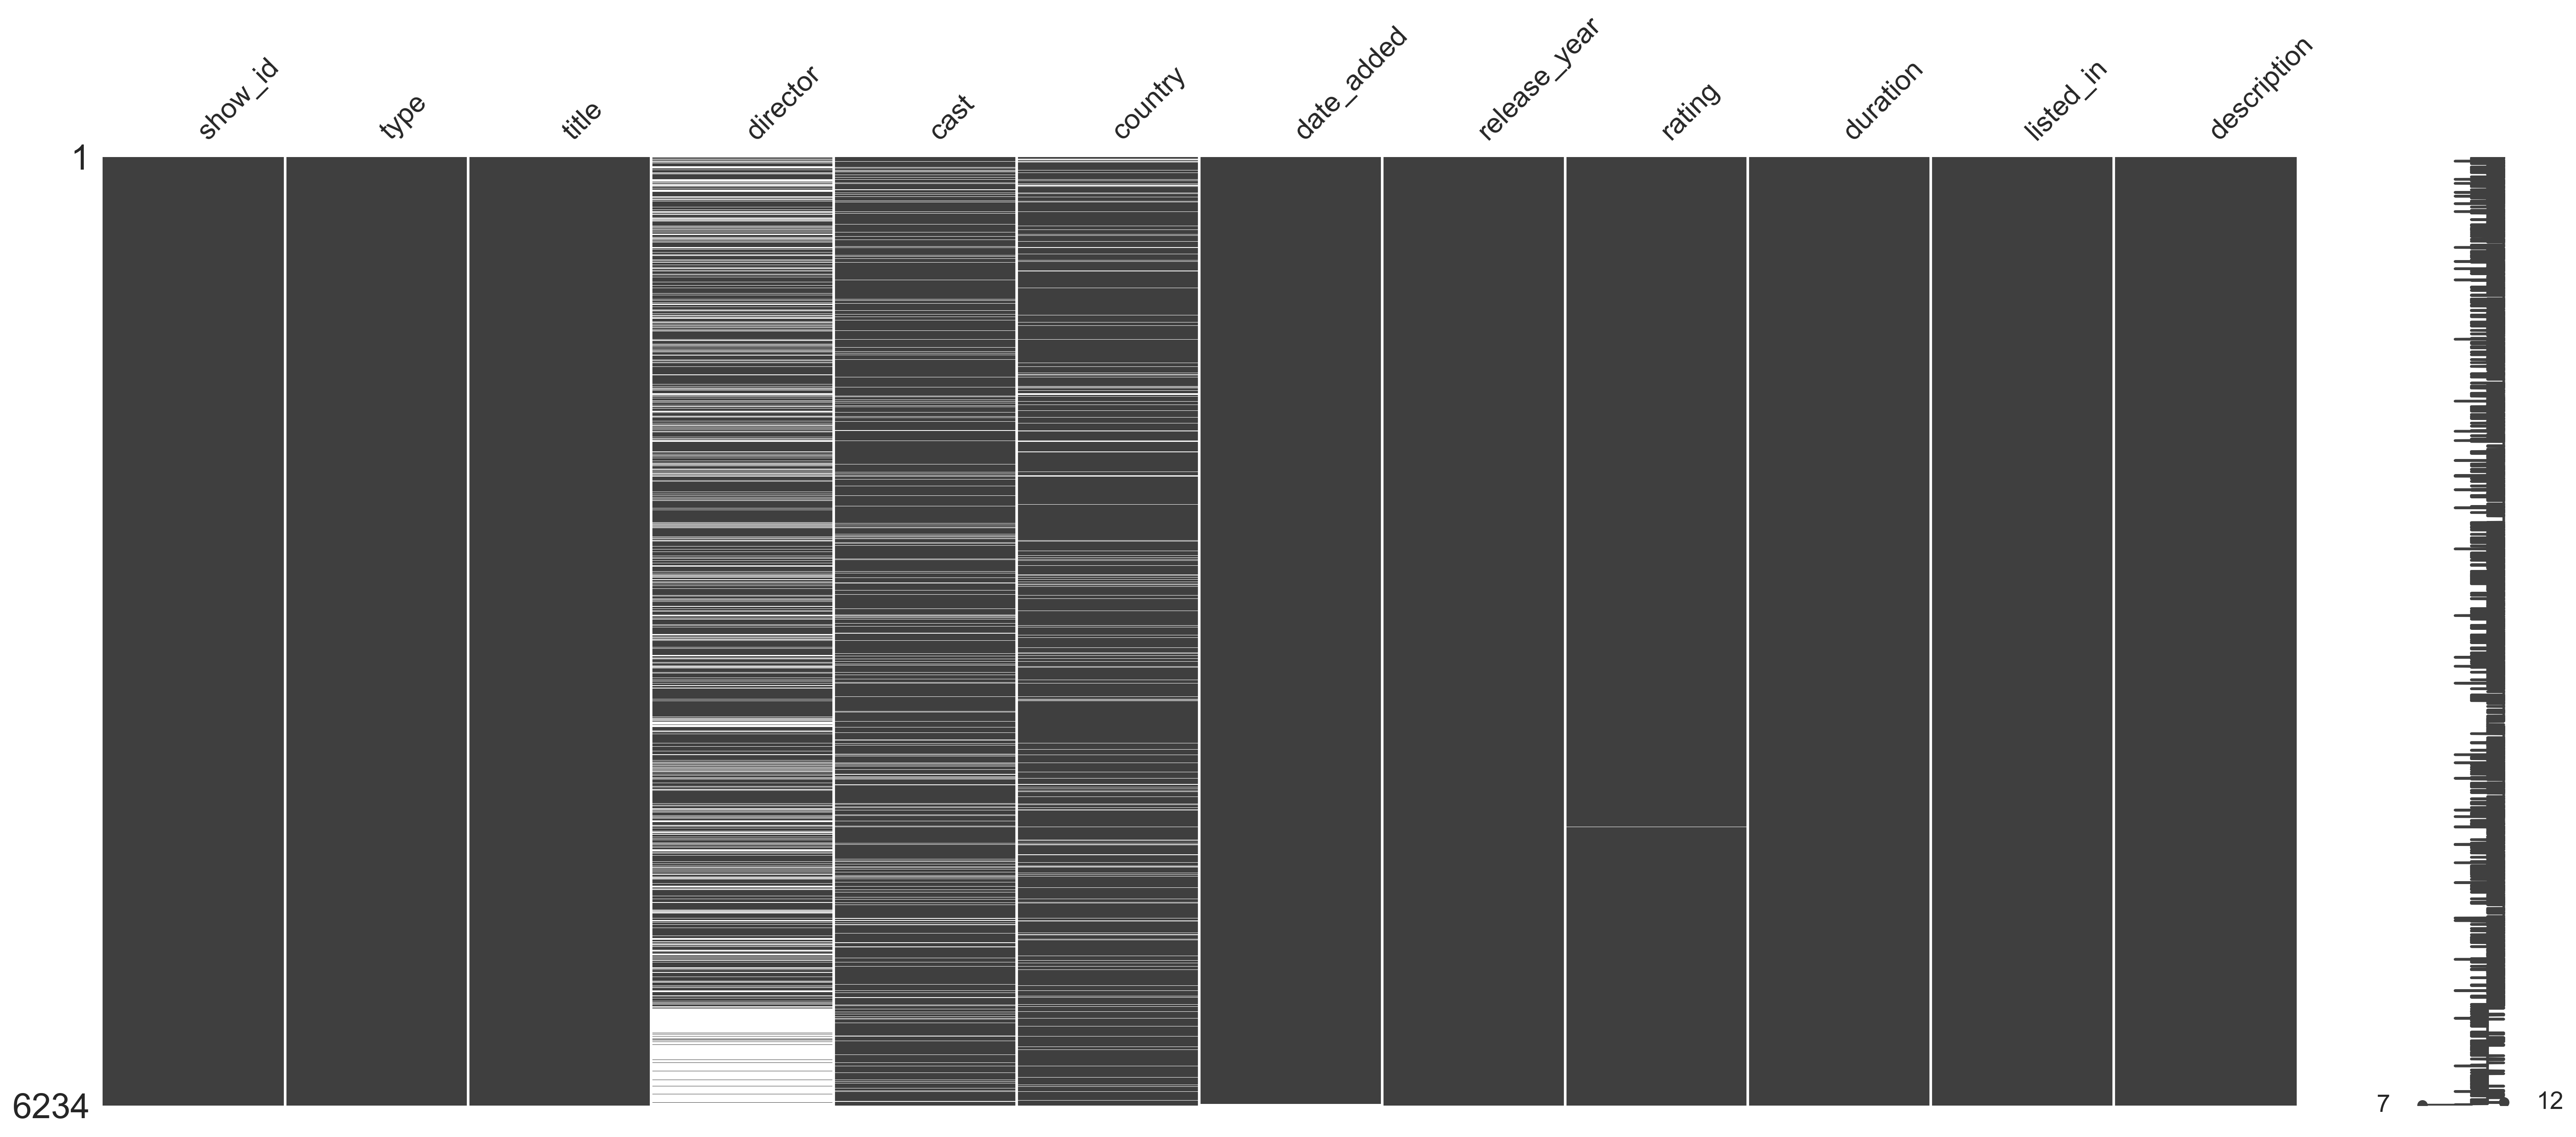

In [ ]:
msno.matrix(data)
plt.show()

In [ ]:
for i in data.columns:
    null_rate=data[i].isna().sum()/len(data)*100
    if null_rate>0:
        print(f"{i}'s null rate:{null_rate}%")

director's null rate:31.584857234520374%
cast's null rate:9.143407122232915%
country's null rate:7.635547000320821%
date_added's null rate:0.17645171639396856%
rating's null rate:0.16041065126724416%


In [ ]:
data.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [ ]:
data.describe(include='all').head(4)

show_id   type        title                director  \
count    6234.0   6234         6234                    4265   
unique      NaN      2         6172                    3301   
top         NaN  Movie  Oh My Ghost  Raúl Campos, Jan Suter   
freq        NaN   4265            3                      18   

                      cast        country       date_added  release_year  \
count                 5664           5758             6223        6234.0   
unique                5469            554             1524           NaN   
top     David Attenborough  United States  January 1, 2020           NaN   
freq                    18           2032              122           NaN   

       rating  duration      listed_in  \
count    6224      6234           6234   
unique     14       201            461   
top     TV-MA  1 Season  Documentaries   
freq     2027      1321            299   

                                              description  
count                                                6234  
unique                                               6226  
top     A surly septuagenarian gets another chance at ...  
freq                                                    3

Which country produces the most Contents?

In [ ]:
from collections import Counter
country_data=data['country']
country_counting=pd.Series(dict(Counter(','.join(country_data).replace(',',',').replace(',',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'],axis=0,inplace=True)

In [ ]:
tot=sum(country_counting)
top20=sum(country_counting[:20])

print(f'total:{tot}')
print(f'top 20 countries:{top20}')
print(f'percentage:{top20}/{tot}={100*top20/tot}')


total:7182
top 20 countries:5726
percentage:5726/7182=79.72709551656921


In [ ]:
top20_country=country_counting[:20]

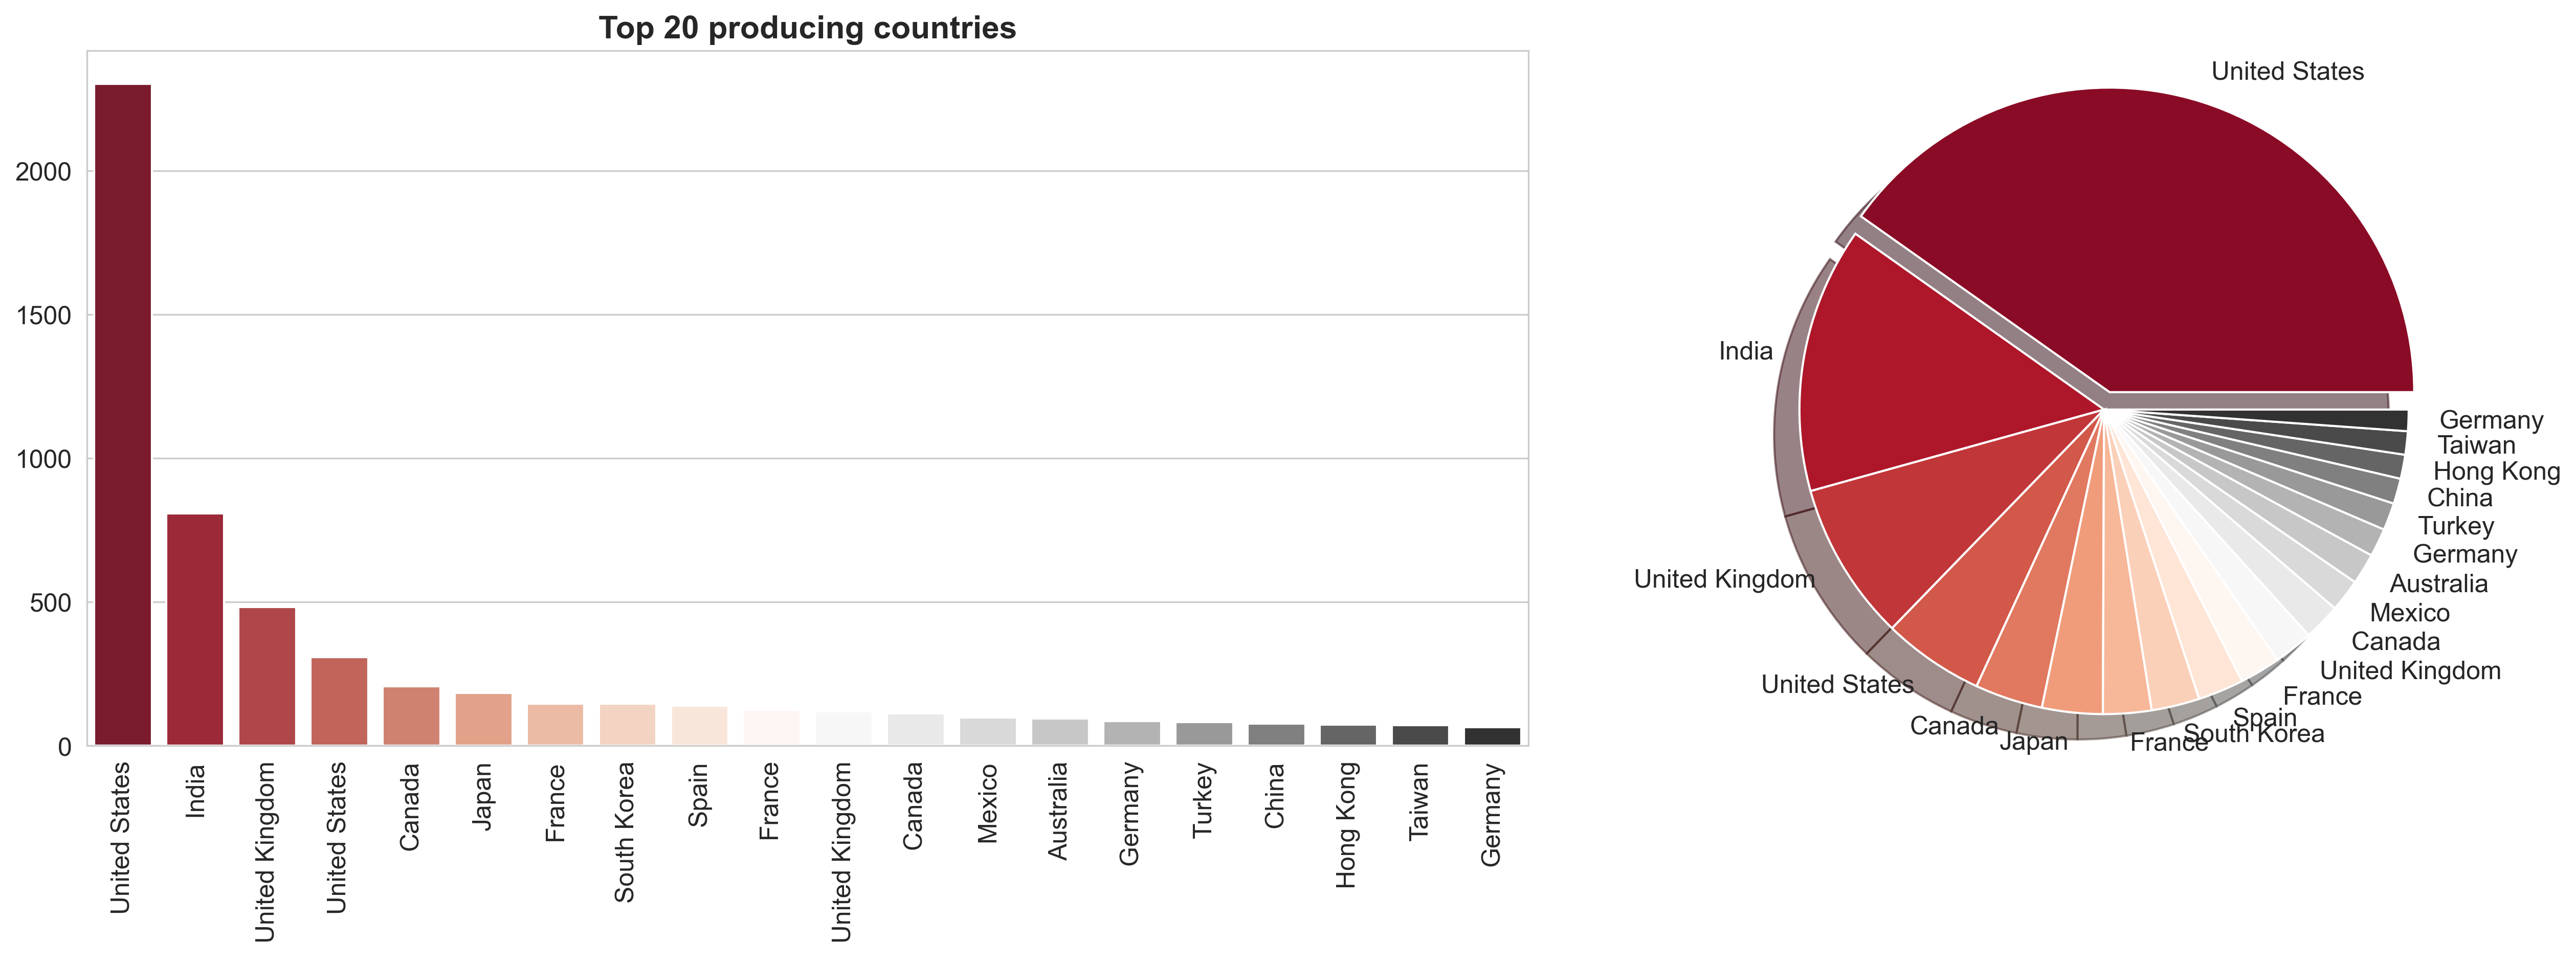

In [ ]:
from matplotlib import gridspec

fig=plt.figure(figsize=(20,6))
gs=gridspec.GridSpec(nrows=1, ncols=2,
                    height_ratios=[6],
                    width_ratios=[10,5])
ax=plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20_country.index,rotation='90')
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')

explode=[0 for _ in range(20)]
explode[0]=0.06

ax2=plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index,
       shadow=True, startangle=0, explode=explode,
       colors=sns.color_palette("RdGy",n_colors=20))
ax2.axis('equal')
plt.show()


TreeMap | Waffle(Mosaic plot)

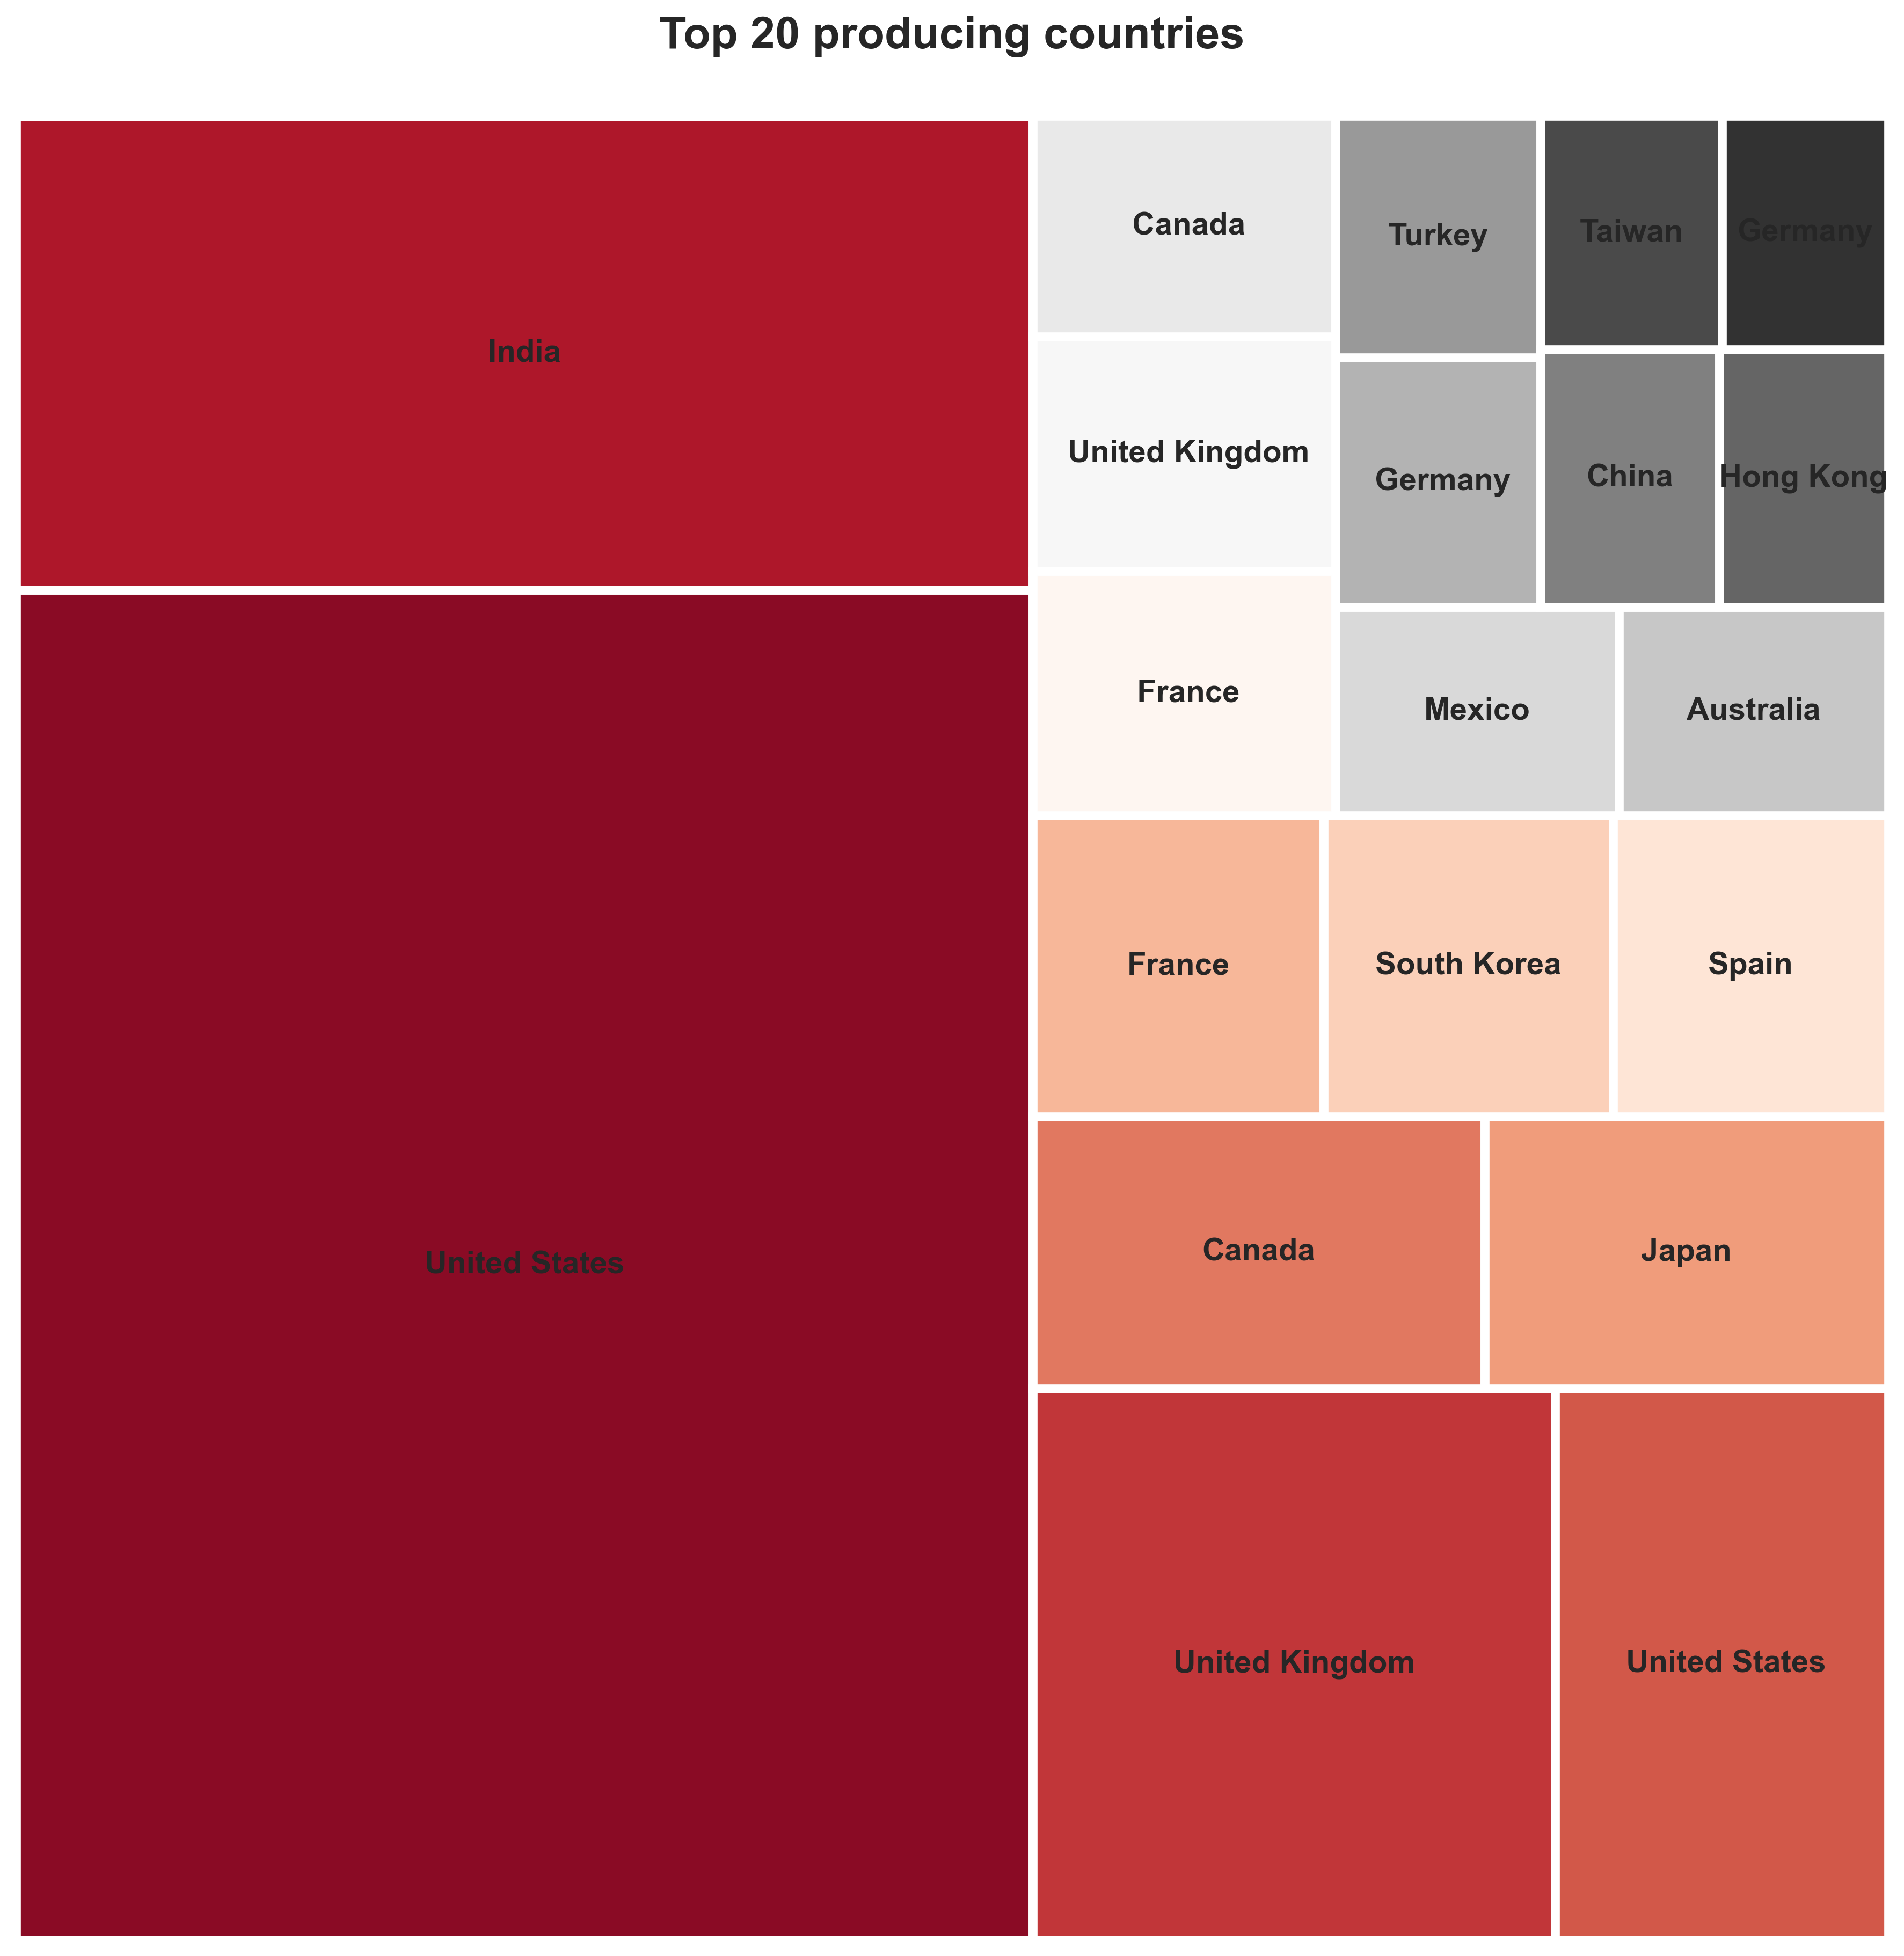

In [ ]:
import squarify

y = top20_country
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

Comparison by country for time 

In [ ]:
import altair as alt
alt.renderers.enable('kaggle')

RendererRegistry.enable('kaggle')

In [ ]:
data['country'] = data['country'].dropna().apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
lst_col = 'country'
data2 = pd.DataFrame({
      col :  np.repeat(data[col].values, data[lst_col].str.len())
      for col in data.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(data[lst_col].values)})[data.columns.tolist()]


In [ ]:
year_country = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')
year_country['top20'] = year_country['country'].apply(lambda x : x in top20_country.index)

year_country = year_country[(year_country['year_added'] >= 1990) & year_country['top20'] & (year_country['year_added'] < 2020)]

alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='center', axis=None),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redgrey'),
        sort=list(top20_country.index)
    ),
).properties(
    height=350,
    width=600
)

alt.Chart(...)

In [ ]:
alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='normalize'),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redgrey'),
        sort=list(top20_country.index)      
    ),
).properties(
    height=350,
    width=600
)

alt.Chart(...)

In [ ]:
import plotly.express as px
year_country2 = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show()


Movie & TV show (Genre)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

Movie Genre Relation

In [ ]:
relation_heatmap(movie,'Movie')

There are 20 types in the Netflix Movie Dataset
